In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
tickers_df = pd.read_csv("sandp500.csv")
tickers_list = tickers_df["Ticker"].tolist()
news_tables = {}
#tickers = tickers_list
tickers = [ 'AMZN','JNJ','JPM','V']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url, headers = {'User-Agent': 'Mozilla/5.0'})
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [67]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 5000:
        break

The return of JEDI: Sequel to military cloud contract will be much more complex
Oct-07-21 04:55PM  
Market Recap: Thursday, October 7
04:35PM  
Amazon listed on building permit at Albuquerque International Sunport
04:23PM  
Is Amazon Stock A Buy Right Now As Epic Battle With Walmart Escalates
01:48PM  
Thinking About Buying Stock Or Options In Bank Of America, AT&T, Amazon Or Costco?
10:32AM  
'Squid Game' global demand has grown over 500+ since Netflix launch: RPT
10:13AM  
Amazon Delivery Partners Rage Against the Machines: We Were Treated Like Robots
10:00AM  
Where Will IBM Be in 3 Years?
09:24AM  
How Atlas Is Driving MongoDB's Growth
09:00AM  
Amazon's Gearing Up for a Massive Fourth Quarter
08:30AM  
Whole Foods to sell Lightlife brand plant-based chicken exclusively in prepared foods departments in North America
08:24AM  
These Are 5 of the Fastest-Growing Large-Cap Stocks on the Planet
07:52AM  
3 Small Stocks That Could Have $100 Billion Market Caps in 10 Years
07:15AM  
The 

In [69]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Oct-07-21',
  '04:55PM',
  'The return of JEDI: Sequel to military cloud contract will be much more complex'],
 ['AMZN', 'Oct-07-21', '04:35PM', 'Market Recap: Thursday, October 7'],
 ['AMZN',
  'Oct-07-21',
  '04:23PM',
  'Amazon listed on building permit at Albuquerque International Sunport'],
 ['AMZN',
  'Oct-07-21',
  '01:48PM',
  'Is Amazon Stock A Buy Right Now As Epic Battle With Walmart Escalates'],
 ['AMZN',
  'Oct-07-21',
  '10:32AM',
  'Thinking About Buying Stock Or Options In Bank Of America, AT&T, Amazon Or Costco?'],
 ['AMZN',
  'Oct-07-21',
  '10:13AM',
  "'Squid Game' global demand has grown over 500+ since Netflix launch: RPT"],
 ['AMZN',
  'Oct-07-21',
  '10:00AM',
  'Amazon\xa0Delivery Partners Rage Against the\xa0Machines: We Were Treated Like Robots'],
 ['AMZN', 'Oct-07-21', '09:24AM', 'Where Will IBM Be in 3 Years?'],
 ['AMZN', 'Oct-07-21', '09:00AM', "How Atlas Is Driving MongoDB's Growth"],
 ['AMZN',
  'Oct-07-21',
  '08:30AM',
  "Amazon's Gearing 

In [70]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-10-07,04:55PM,The return of JEDI: Sequel to military cloud c...,0.000,1.000,0.000,0.0000
1,AMZN,2021-10-07,04:35PM,"Market Recap: Thursday, October 7",0.000,1.000,0.000,0.0000
2,AMZN,2021-10-07,04:23PM,Amazon listed on building permit at Albuquerqu...,0.000,0.825,0.175,0.1779
3,AMZN,2021-10-07,01:48PM,Is Amazon Stock A Buy Right Now As Epic Battle...,0.182,0.699,0.119,-0.2263
4,AMZN,2021-10-07,10:32AM,Thinking About Buying Stock Or Options In Bank...,0.000,0.884,0.116,0.1779


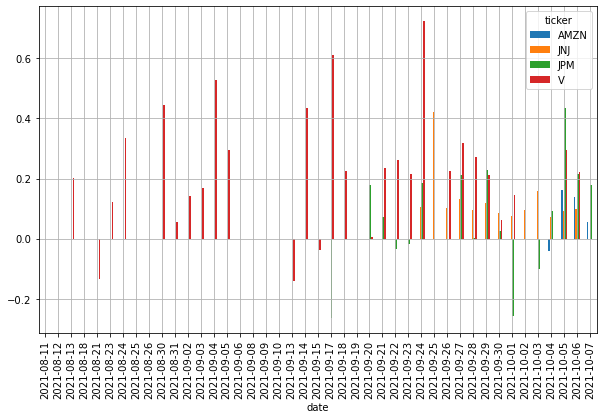

In [54]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [71]:
mean_scores

ticker,AMZN,JNJ,JPM,V
date,,,,
2021-08-11,NaN,NaN,NaN,0.000000
2021-08-12,NaN,NaN,NaN,0.000000
2021-08-13,NaN,NaN,NaN,0.202300
2021-08-18,NaN,NaN,NaN,0.000000
2021-08-21,NaN,NaN,NaN,-0.133967
2021-08-23,NaN,NaN,NaN,0.120400
2021-08-24,NaN,NaN,NaN,0.333333
2021-08-25,NaN,NaN,NaN,0.000000
2021-08-26,NaN,NaN,NaN,0.000000
